<a href="https://colab.research.google.com/github/Arainal0112/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama : Arainal Aldiansyah
- Kelas : TI - 3C
- Absen : 3

In [1]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


## Praktikum 1

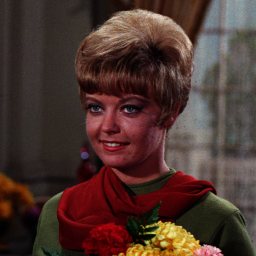

In [70]:
# Import
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/female.tiff')
cv2_imshow(img)

### 1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


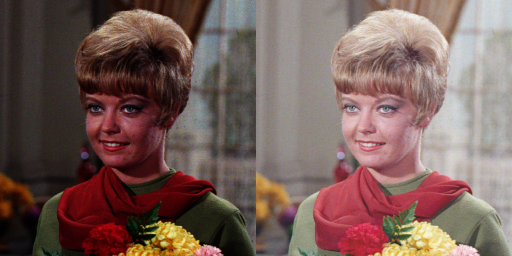

In [22]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

gamma_image = np.zeros(img.shape, img.dtype)

for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    for z in range(img.shape[2]):
     gamma_image[x,y,z] = np.clip(255 * pow(img[x,y,z]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((img, gamma_image))
cv2_imshow(final_frame)

2. Buat Depth

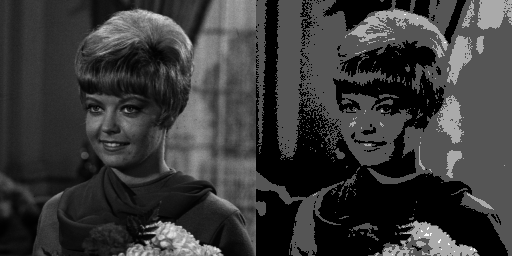

In [81]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/female.tiff', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR to RGB

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

depth_image = np.zeros(original.shape, original.dtype)  # Initialize depth_image array

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            depth_image[y, x, c] = np.clip(round(original[y, x, c] / level) * level, 0, 255)


final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Average Denoising


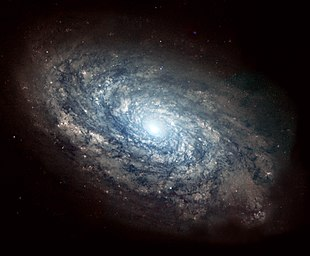

In [93]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img_galaxy = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')
original_galaxy= cv.cvtColor(img_galaxy,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(original_galaxy)

Nilai PSNR adalah 19.523959737369452 (dB)


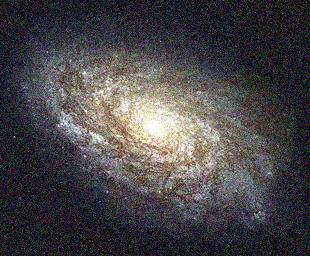

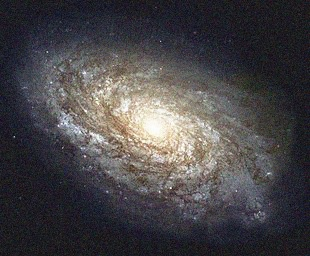

In [104]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 5
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)


Nilai PSNR adalah 19.87268724392074 (dB)


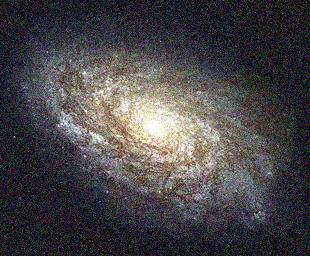

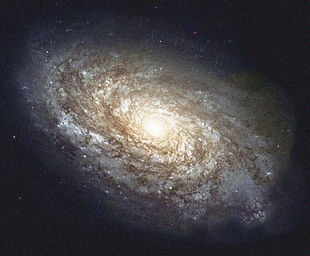

In [105]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 30
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)


Nilai PSNR adalah 19.90891202598279 (dB)


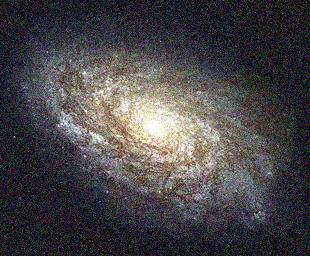

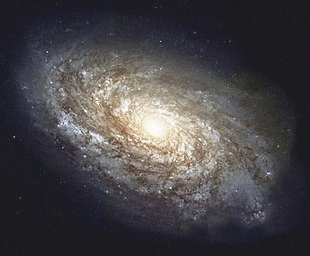

In [106]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 60
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)


Nilai PSNR adalah 19.915894437516535 (dB)


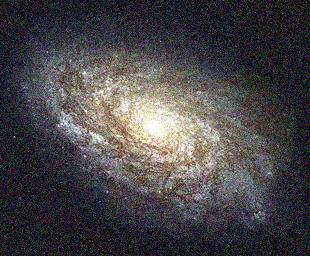

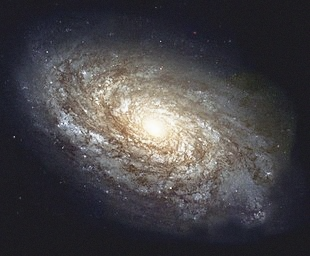

In [107]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 80
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)


In [111]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 100
for i in range(jumlah_gambar):
  denoised_image = denoised_image + cv_img[i]

denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)


4. Masking

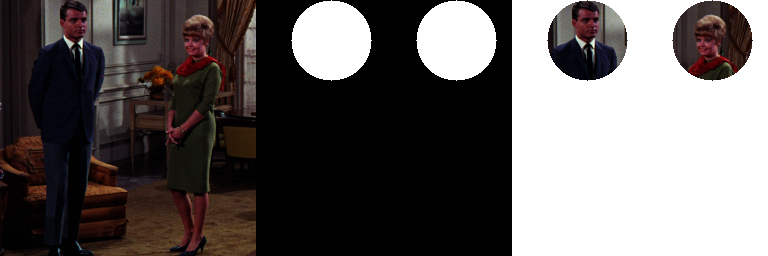

In [112]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

original41 = ~ img4

result_AND = ~ (mask & original41)

final_frame = cv.hconcat((img4, mask, result_AND))
cv2_imshow(final_frame)

## OR

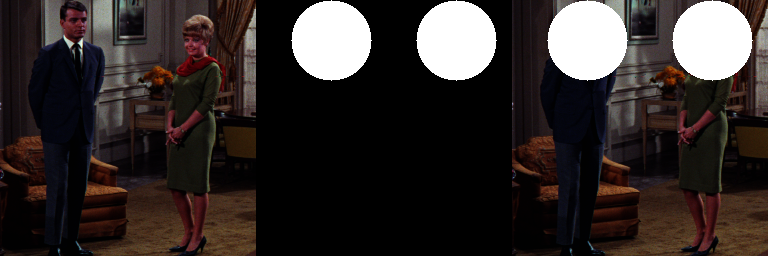

In [113]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 | mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 | mask1

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)


## NOT

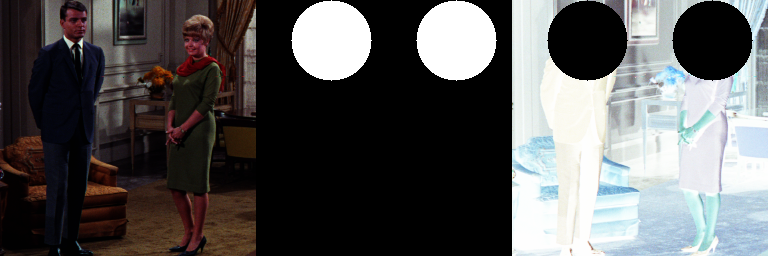

In [114]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = ~img4 & ~mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~img4 & ~mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

## NAND

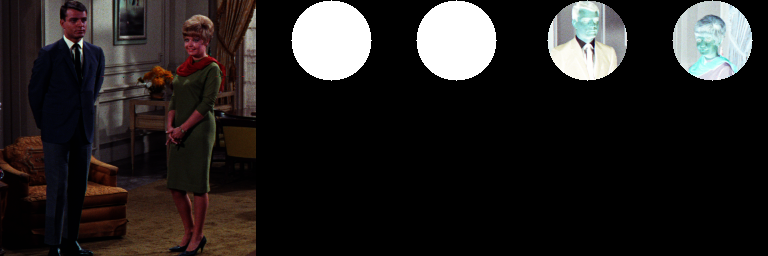

In [115]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = ~ img4 & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~ img4 & mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

XOR

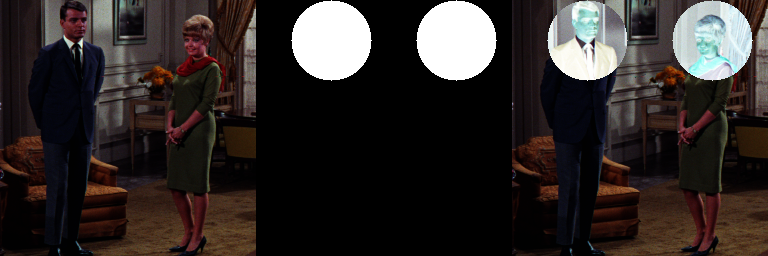

In [116]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 ^ mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 ^ mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

# Tugas

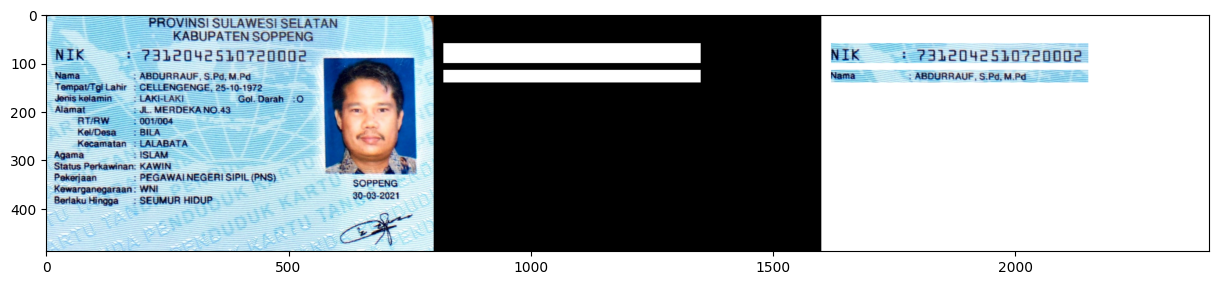

In [98]:
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/KTP.jpeg')
img_ktp2 = cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB)

image_masking = np.zeros(img_ktp2.shape, dtype=np.uint8) # Mengambil ukuran dari img_ktp

masking1 = cv.rectangle(image_masking, pt1=(20,60), pt2=(550,100), color=(255,255,255), thickness=cv.FILLED)


masking2 = cv.rectangle(image_masking, pt1=(20,115), pt2=(435,140), color=(255,255,255), thickness=cv.FILLED)

#Operasi NOT pada img_ktp2 dengan membalikan nilai bit
original = ~ img_ktp2

#Operasi And
hasil_AND = ~ (image_masking & original)

final_frame = cv.hconcat((img_ktp2, image_masking, hasil_AND))
plt.figure(figsize=(15, 5)) # Mengatur ukuran tampilan
plt.imshow(final_frame)
plt.show()